In [36]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

matches_df = pd.read_csv('C:\\Users\\santo\\Downloads\\odi wc 23\\Matches.csv')
ball_by_ball_df = pd.read_csv('C:\\Users\\santo\\Downloads\\odi wc 23\\BallbyBallData.csv')

print(matches_df.head())  # matches_df is your matches file DataFrame
print(ball_by_ball_df.head())  # ball_by_ball_df is your ball-by-ball file DataFrame

    season         team1        team2        date  match_number  \
0  2023/24       England  New Zealand  05/10/2023             1   
1  2023/24      Pakistan  Netherlands  06/10/2023             2   
2  2023/24   Afghanistan   Bangladesh  07/10/2023             3   
3  2023/24  South Africa    Sri Lanka  07/10/2023             4   
4  2023/24     Australia        India  08/10/2023             5   

                                          venue        city  toss_winner  \
0                         Narendra Modi Stadium   Ahmedabad  New Zealand   
1            Rajiv Gandhi International Stadium   Hyderabad  Netherlands   
2  Himachal Pradesh Cricket Association Stadium  Dharamsala   Bangladesh   
3                          Arun Jaitley Stadium       Delhi    Sri Lanka   
4                        MA Chidambaram Stadium     Chennai    Australia   

  toss_decision     player_of_match          umpire1           umpire2  \
0         field          R Ravindra  HDPK Dharmasena       Nitin M

In [37]:
# Create a DataFrame to hold the toss analysis results
teams = pd.concat([matches_df['team1'], matches_df['team2']]).unique()
toss_analysis_df = pd.DataFrame({
    'team': teams,
    'toss_wins': 0,
    'matches_won_after_toss_win': 0,
    'matches_lost_after_toss_win': 0,
    'toss_losses': 0,
    'matches_won_after_toss_loss': 0,
    'matches_lost_after_toss_loss': 0
})

# Calculate toss analysis
for index, row in matches_df.iterrows():
    toss_winner = row['toss_winner']
    winner = row['winner']
    
    # Update toss wins
    toss_analysis_df.loc[toss_analysis_df['team'] == toss_winner, 'toss_wins'] += 1
    if winner == toss_winner:
        toss_analysis_df.loc[toss_analysis_df['team'] == toss_winner, 'matches_won_after_toss_win'] += 1
    else:
        toss_analysis_df.loc[toss_analysis_df['team'] == toss_winner, 'matches_lost_after_toss_win'] += 1
    
    # Update toss losses
    toss_loser = row['team1'] if toss_winner == row['team2'] else row['team2']
    toss_analysis_df.loc[toss_analysis_df['team'] == toss_loser, 'toss_losses'] += 1
    if winner == toss_loser:
        toss_analysis_df.loc[toss_analysis_df['team'] == toss_loser, 'matches_won_after_toss_loss'] += 1
    else:
        toss_analysis_df.loc[toss_analysis_df['team'] == toss_loser, 'matches_lost_after_toss_loss'] += 1

# Display the results
print(toss_analysis_df)


           team  toss_wins  matches_won_after_toss_win  \
0       England          7                           2   
1      Pakistan          4                           1   
2   Afghanistan          5                           1   
3  South Africa          3                           1   
4     Australia          5                           3   
5   New Zealand          5                           3   
6     Sri Lanka          4                           0   
7    Bangladesh          5                           2   
8   Netherlands          5                           1   
9         India          5                           5   

   matches_lost_after_toss_win  toss_losses  matches_won_after_toss_loss  \
0                            5            2                            1   
1                            3            5                            3   
2                            4            4                            3   
3                            2            7              

<Figure size 1400x700 with 0 Axes>

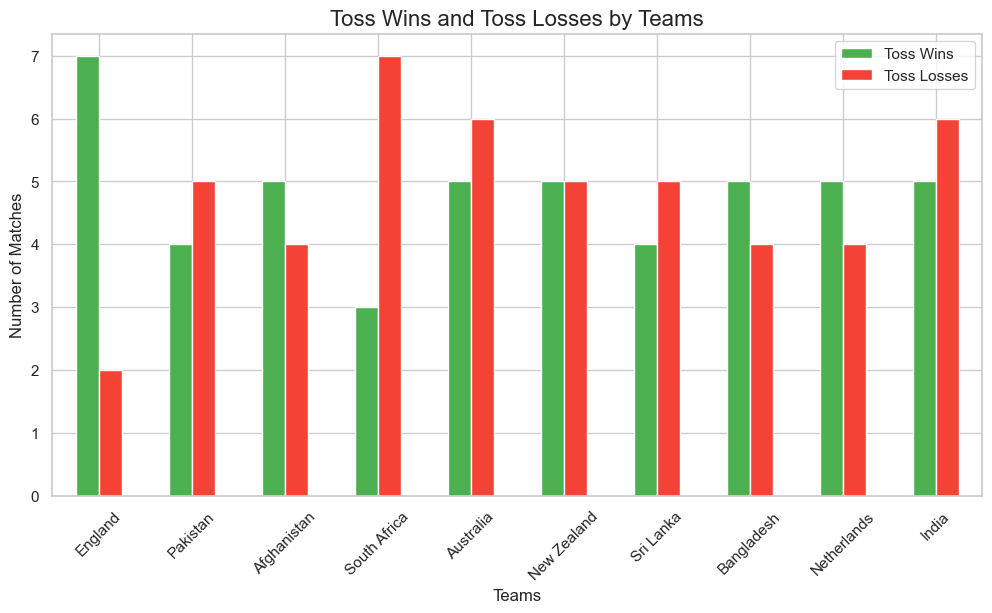

In [38]:
# Plot toss wins and toss losses for each team
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Bar plot for toss wins and toss losses
toss_wins_losses = toss_analysis_df[['team', 'toss_wins', 'toss_losses']].set_index('team')

# Plot
toss_wins_losses.plot(kind='bar', stacked=False, figsize=(12, 6), color=['#4caf50', '#f44336'])
plt.title('Toss Wins and Toss Losses by Teams', fontsize=16)
plt.ylabel('Number of Matches')
plt.xlabel('Teams')
plt.xticks(rotation=45)
plt.legend(['Toss Wins', 'Toss Losses'], loc='upper right')
plt.show()


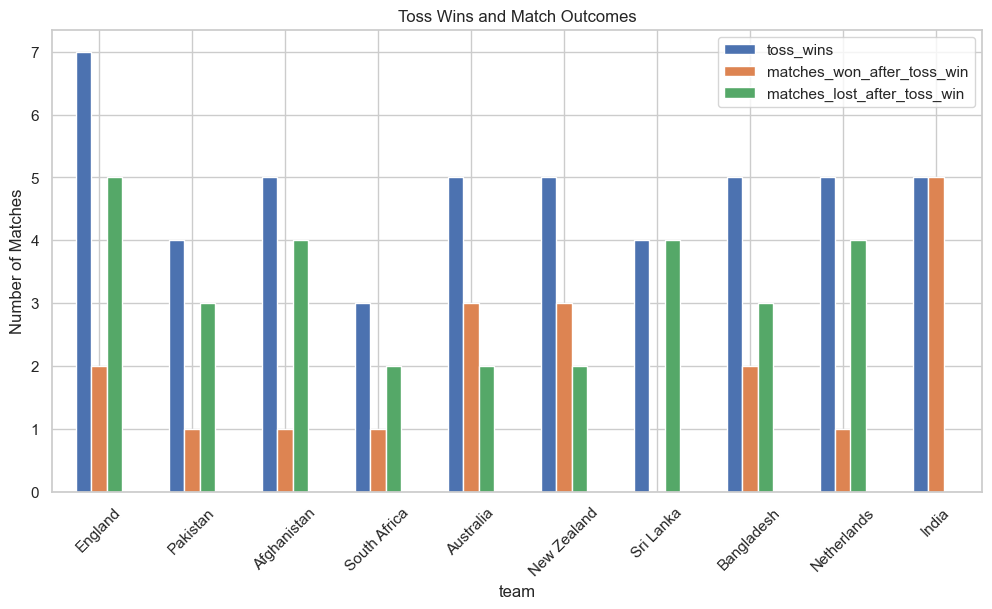

In [39]:
# Example: Bar plot for toss wins and match outcomes
toss_analysis_df.set_index('team')[['toss_wins', 'matches_won_after_toss_win', 'matches_lost_after_toss_win']].plot(kind='bar', figsize=(12, 6))
plt.title('Toss Wins and Match Outcomes')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x700 with 0 Axes>

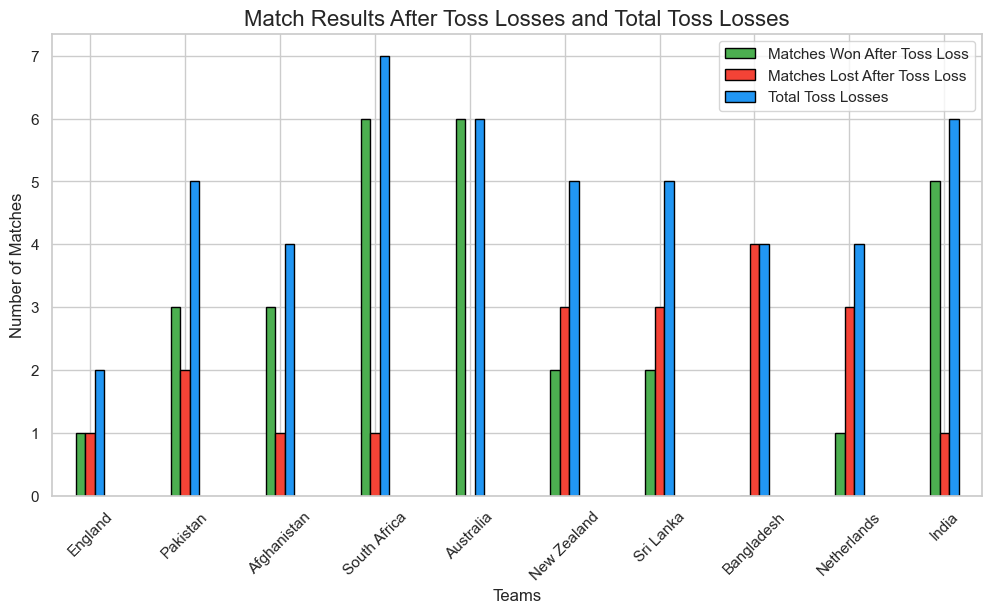

In [40]:
# Plot match results after toss losses and total toss losses (side-by-side bars)
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Prepare the data with extra column for toss losses
toss_losses_outcomes = toss_analysis_df[['team', 'matches_won_after_toss_loss', 'matches_lost_after_toss_loss', 'toss_losses']].set_index('team')

# Plot side-by-side bars
toss_losses_outcomes.plot(kind='bar', stacked=False, width=0.3, figsize=(12, 6), color=['#4caf50', '#f44336', '#2196f3'], edgecolor='black')

plt.title('Match Results After Toss Losses and Total Toss Losses', fontsize=16)
plt.ylabel('Number of Matches')
plt.xlabel('Teams')
plt.xticks(rotation=45)
plt.legend(['Matches Won After Toss Loss', 'Matches Lost After Toss Loss', 'Total Toss Losses'], loc='upper right')
plt.show()


In [41]:
from scipy.stats import chi2_contingency

# Create a contingency table:
# Each cell will contain the count of matches where the team either won or lost the toss and won or lost the match.

# Calculate the number of matches won/lost after winning/losing toss
toss_win_match_win = toss_analysis_df['matches_won_after_toss_win'].sum()
toss_win_match_loss = toss_analysis_df['matches_lost_after_toss_win'].sum()
toss_loss_match_win = toss_analysis_df['matches_won_after_toss_loss'].sum()
toss_loss_match_loss = toss_analysis_df['matches_lost_after_toss_loss'].sum()

# Create a contingency table
contingency_table = [[toss_win_match_win, toss_win_match_loss], 
                     [toss_loss_match_win, toss_loss_match_loss]]

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the test results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Check if the p-value is below the significance level (usually 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Toss outcome has a significant impact on match result.")
else:
    print("Fail to reject the null hypothesis: Toss outcome does not have a significant impact on match result.")


Chi-Square Statistic: 3.375
P-Value: 0.06619257972219346
Fail to reject the null hypothesis: Toss outcome does not have a significant impact on match result.


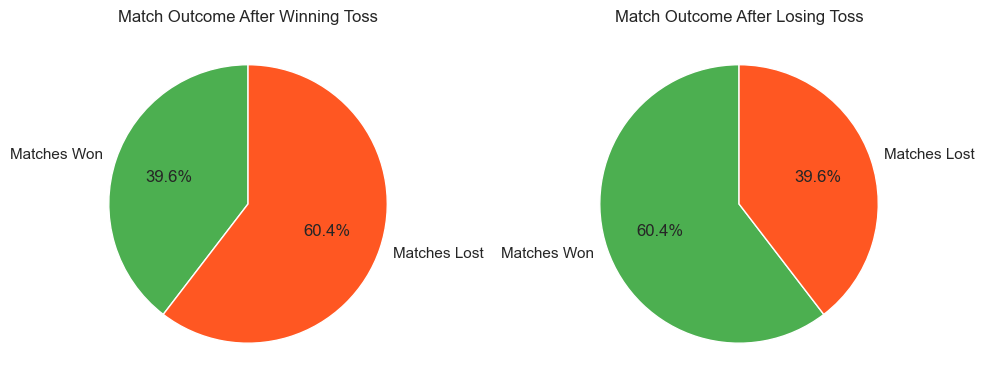

In [42]:
import matplotlib.pyplot as plt

# Data: Matches won/lost after winning/losing toss
toss_win_outcomes = [toss_win_match_win, toss_win_match_loss]
toss_loss_outcomes = [toss_loss_match_win, toss_loss_match_loss]

# Labels for the chart
labels = ['Matches Won', 'Matches Lost']

# Colors for the pie chart
colors = ['#4CAF50', '#FF5722']

# Plot 1: Matches After Winning Toss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(toss_win_outcomes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Match Outcome After Winning Toss')

# Plot 2: Matches After Losing Toss
plt.subplot(1, 2, 2)
plt.pie(toss_loss_outcomes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Match Outcome After Losing Toss')

# Show the plots
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

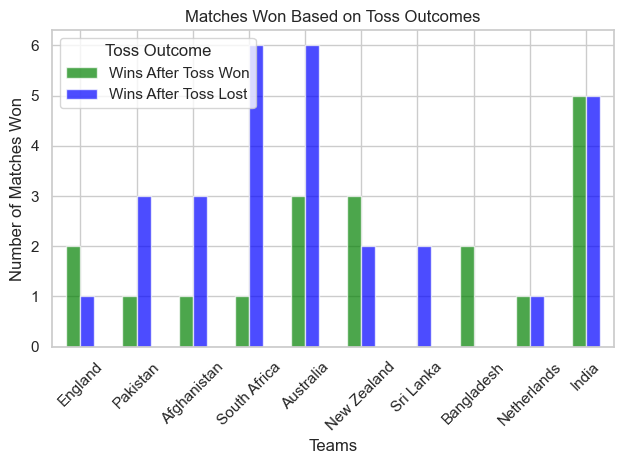

<Figure size 1200x600 with 0 Axes>

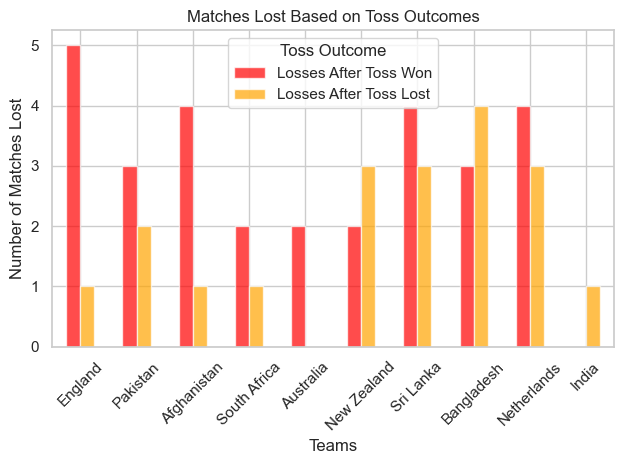

              Total Matches  Wins After Toss Won  Losses After Toss Won  \
Team                                                                      
England                   9                    2                      5   
Pakistan                  9                    1                      3   
Afghanistan               9                    1                      4   
South Africa             10                    1                      2   
Australia                11                    3                      2   
New Zealand              10                    3                      2   
Sri Lanka                 9                    0                      4   
Bangladesh                9                    2                      3   
Netherlands               9                    1                      4   
India                    11                    5                      0   

              Wins After Toss Lost  Losses After Toss Lost  
Team                                  

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty list to store the data
team_toss_stats_list = []

# Loop through each team and calculate the statistics
for team in teams:
    # Filter matches for this team (either as team1 or team2)
    team_matches = matches_df[(matches_df['team1'] == team) | (matches_df['team2'] == team)]
    
    # Total matches played by the team
    total_matches = team_matches.shape[0]
    
    # Toss wins and losses for the team
    toss_wins = team_matches[team_matches['toss_winner'] == team]
    toss_losses = team_matches[team_matches['toss_winner'] != team]
    
    # Calculate wins and losses when toss won
    wins_after_toss_won = toss_wins[toss_wins['winner'] == team].shape[0]
    losses_after_toss_won = toss_wins[toss_wins['winner'] != team].shape[0]
    
    # Calculate wins and losses when toss lost
    wins_after_toss_lost = toss_losses[toss_losses['winner'] == team].shape[0]
    losses_after_toss_lost = toss_losses[toss_losses['winner'] != team].shape[0]
    
    # Add the stats to the list
    team_toss_stats_list.append({
        'Team': team,
        'Total Matches': total_matches,
        'Wins After Toss Won': wins_after_toss_won,
        'Losses After Toss Won': losses_after_toss_won,
        'Wins After Toss Lost': wins_after_toss_lost,
        'Losses After Toss Lost': losses_after_toss_lost
    })

# Convert the list into a DataFrame
team_toss_stats = pd.DataFrame(team_toss_stats_list)

# Set the team names as the index for easier plotting
team_toss_stats.set_index('Team', inplace=True)

# Plotting wins after toss outcomes
plt.figure(figsize=(12, 6))
team_toss_stats[['Wins After Toss Won', 'Wins After Toss Lost']].plot(kind='bar', color=['green', 'blue'], alpha=0.7)
plt.title('Matches Won Based on Toss Outcomes')
plt.xlabel('Teams')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=45)
plt.legend(title='Toss Outcome')
plt.tight_layout()
plt.show()

# Plotting losses after toss outcomes
plt.figure(figsize=(12, 6))
team_toss_stats[['Losses After Toss Won', 'Losses After Toss Lost']].plot(kind='bar', color=['red', 'orange'], alpha=0.7)
plt.title('Matches Lost Based on Toss Outcomes')
plt.xlabel('Teams')
plt.ylabel('Number of Matches Lost')
plt.xticks(rotation=45)
plt.legend(title='Toss Outcome')
plt.tight_layout()
plt.show()

# Print the DataFrame for reference
print(team_toss_stats)


Total Runs Scored by India: 3160
Total Matches Played by India: 11

Top Scorers for India:
          striker  runs_off_bat  balls_faced  fours  sixes  strike_rate
12        V Kohli           765          866     68      9    88.337182
8       RG Sharma           597          485     66     31   123.092784
10        SS Iyer           530          485     37     24   109.278351
3        KL Rahul           452          504     38      9    89.682540
11   Shubman Gill           354          339     41     12   104.424779
7       RA Jadeja           120          122      7      3    98.360656
9        SA Yadav           106          108     12      1    98.148148
1    Ishan Kishan            47           49      5      2    95.918367
4   Kuldeep Yadav            19           34      1      0    55.882353
2       JJ Bumrah            18           29      1      0    62.068966

Average Runs Scored per Match by India: 287.27

Top Partnerships for India:
         striker   non_striker  total_ru

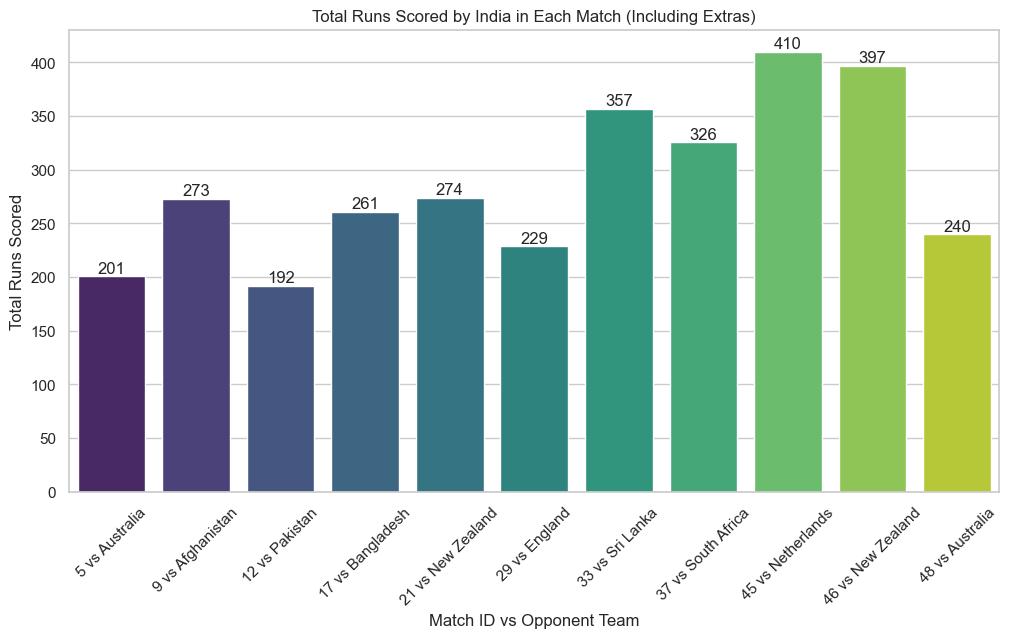

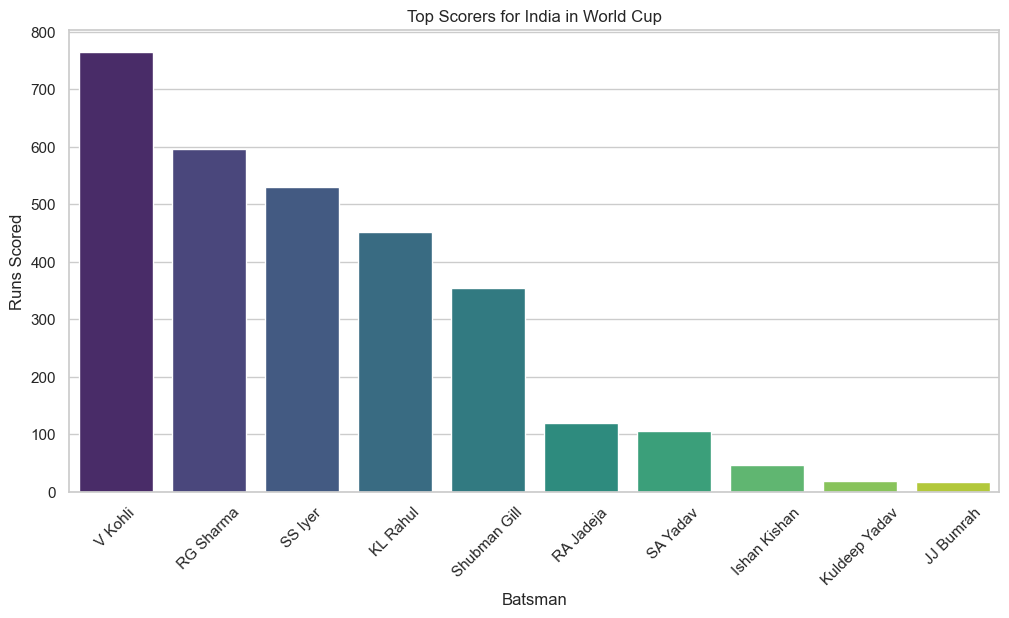

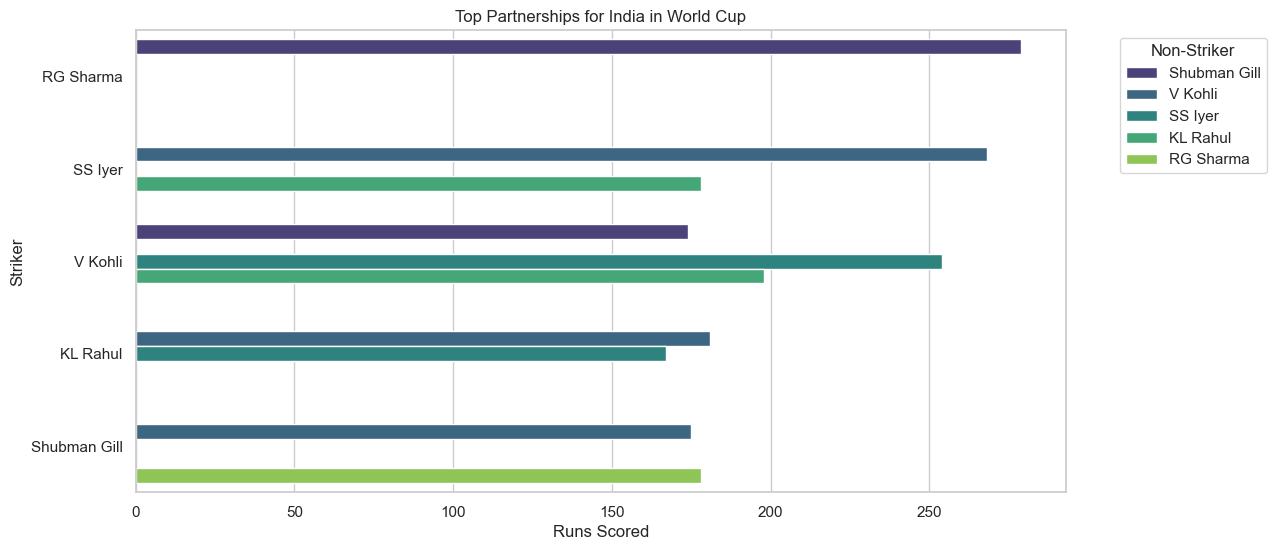

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ball_by_ball_df and matches_df are already defined DataFrames

# Step 1: Filter Data for All Matches Involving India
india_batting_df = ball_by_ball_df[
    (ball_by_ball_df['batting_team'] == 'India')
]

# Step 2: Add Total Runs (Including Extras)
india_batting_df['total_runs'] = india_batting_df['runs_off_bat'] + india_batting_df['extras']

# Step 3: Total Runs Scored Across All Matches
total_runs_india = india_batting_df['total_runs'].sum()
matches_played = india_batting_df['match_id'].nunique()

print(f"Total Runs Scored by India: {total_runs_india}")
print(f"Total Matches Played by India: {matches_played}")

# Step 4: Top Scorers
top_scorers = india_batting_df.groupby('striker').agg(
    runs_off_bat=('runs_off_bat', 'sum'),
    balls_faced=('ball', 'count'),
    fours=('runs_off_bat', lambda x: (x == 4).sum()),  # Count of 4s
    sixes=('runs_off_bat', lambda x: (x == 6).sum())   # Count of 6s
).reset_index()

top_scorers['strike_rate'] = (top_scorers['runs_off_bat'] / top_scorers['balls_faced']) * 100
top_scorers = top_scorers.sort_values(by='runs_off_bat', ascending=False).head(10)

print("\nTop Scorers for India:")
print(top_scorers)

# Step 5: Average Runs per Match
average_runs_per_match = total_runs_india / matches_played
print(f"\nAverage Runs Scored per Match by India: {average_runs_per_match:.2f}")

# Step 6: Partnership Analysis
# Create a partnership DataFrame
partnerships = india_batting_df.groupby(['match_id', 'striker', 'non_striker']).agg(
    runs_off_bat=('runs_off_bat', 'sum'),
    balls_faced=('ball', 'count')  # Count of balls faced in partnership
).reset_index()

# Calculate additional stats for partnerships
partnerships_summary = partnerships.groupby(['striker', 'non_striker']).agg(
    total_runs=('runs_off_bat', 'sum'),
    total_balls=('balls_faced', 'sum')
).reset_index()
partnerships_summary['strike_rate'] = (partnerships_summary['total_runs'] / partnerships_summary['total_balls']) * 100
partnerships_summary = partnerships_summary.sort_values(by='total_runs', ascending=False).head(10)

print("\nTop Partnerships for India:")
print(partnerships_summary)

# Step 7: Visualizations
# 1. Total Runs Scored per Match (Including Extras)
# Merge to get opponent information
merged_df = india_batting_df.merge(matches_df[['match_number', 'team1', 'team2']], 
                                     left_on='match_id', right_on='match_number', how='left')

# Determine opponent team
merged_df['opponent'] = merged_df.apply(
    lambda row: row['team2'] if row['team1'] == 'India' else row['team1'], axis=1
)

# Group by match_id and opponent to get total runs
match_runs = merged_df.groupby(['match_id', 'opponent'])['total_runs'].sum().reset_index()

# Create a combined column for x-axis
match_runs['match_info'] = match_runs['match_id'].astype(str) + " vs " + match_runs['opponent']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=match_runs, x='match_info', y='total_runs', palette='viridis')  # Use match_info for x-axis
plt.title('Total Runs Scored by India in Each Match (Including Extras)')
plt.xlabel('Match ID vs Opponent Team')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45)

# Annotate the bars with the total runs
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

# 2. Top Scorers Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=top_scorers, x='striker', y='runs_off_bat', palette='viridis')
plt.title('Top Scorers for India in World Cup')
plt.xlabel('Batsman')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.show()

# 3. Partnerships Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=partnerships_summary, x='total_runs', y='striker', hue='non_striker', palette='viridis')
plt.title('Top Partnerships for India in World Cup')
plt.xlabel('Runs Scored')
plt.ylabel('Striker')
plt.legend(title='Non-Striker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [76]:
# Step 1: Filter ball_by_ball_df for Indian bowling
india_bowling_df = ball_by_ball_df[ball_by_ball_df['bowling_team'] == 'India']

# Step 2: Total wickets taken by Indian bowlers (excluding runouts)
total_wickets_india = india_bowling_df[india_bowling_df['wicket_type'] != 'run out']['wicket_type'].notnull().sum()
print(f"Total wickets taken by India (excluding runouts): {total_wickets_india}")

# Step 3: Calculate total runs conceded (including extras) and balls bowled for each bowler
india_bowling_stats = (
    india_bowling_df.groupby('bowler')
    .agg(
        total_runs_conceded=('runs_off_bat', 'sum'),
        extras_given=('extras', 'sum'),  # Sum of extras given
        balls_bowled=('ball', 'count'),
        wickets=('wicket_type', lambda x: x[(x != 'run out')].notnull().sum())
    )
    .reset_index()
)

# Calculate total runs conceded including extras
india_bowling_stats['total_runs_conceded'] = india_bowling_stats['total_runs_conceded'] + india_bowling_stats['extras_given']

# Step 4: Calculate overs and economy rate
india_bowling_stats['overs_bowled'] = india_bowling_stats['balls_bowled'] / 6
india_bowling_stats['economy_rate'] = india_bowling_stats['total_runs_conceded'] / india_bowling_stats['overs_bowled']

# Step 5: Display the stats sorted by economy rate
print(india_bowling_stats[['bowler', 'total_runs_conceded', 'extras_given', 'balls_bowled', 'wickets', 'overs_bowled', 'economy_rate']].sort_values(by='economy_rate'))


Total wickets taken by India (excluding runouts): 99
            bowler  total_runs_conceded  extras_given  balls_bowled  wickets  \
5         R Ashwin                   34             0            60        1   
1        JJ Bumrah                  381            34           573       20   
11         V Kohli                   15             0            21        1   
6        RA Jadeja                  407            14           565       16   
2    Kuldeep Yadav                  431            11           575       15   
3   Mohammed Shami                  265            27           302       24   
10    Shubman Gill                   11             0            12        0   
4   Mohammed Siraj                  491            39           512       14   
9        SN Thakur                  102             2           104        2   
0        HH Pandya                  115             5           101        5   
7        RG Sharma                    7             0             5

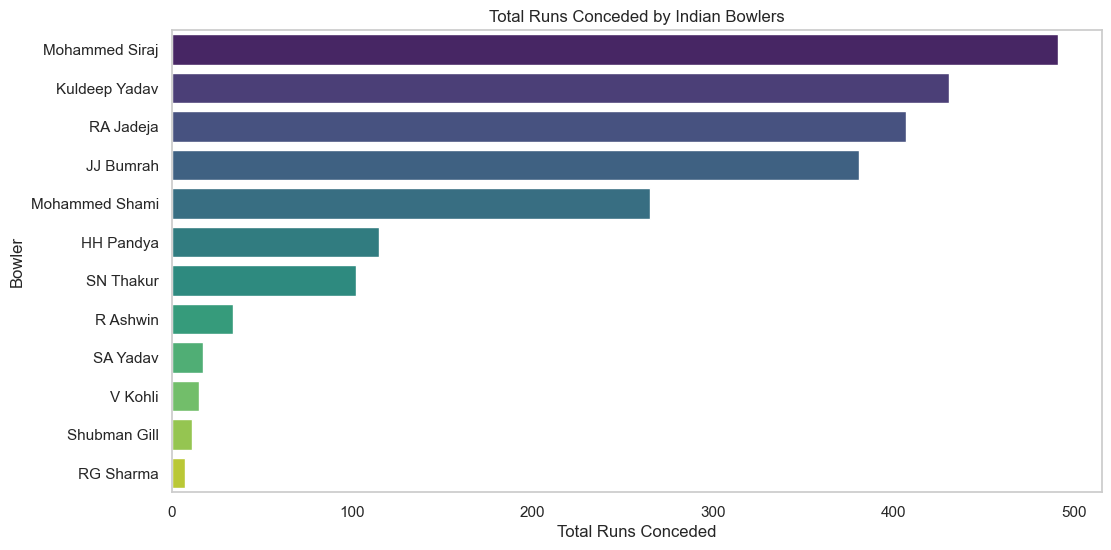

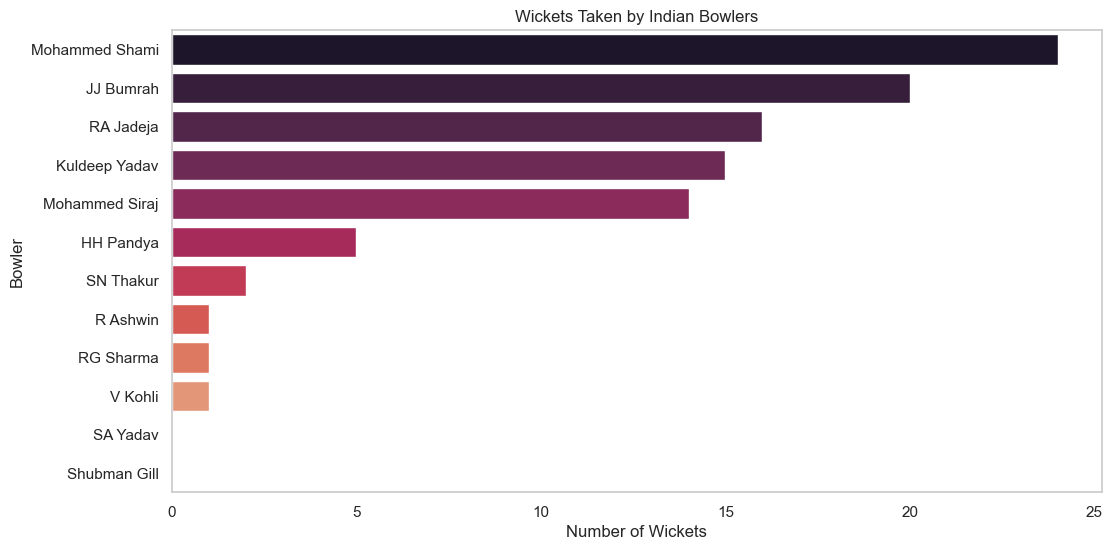

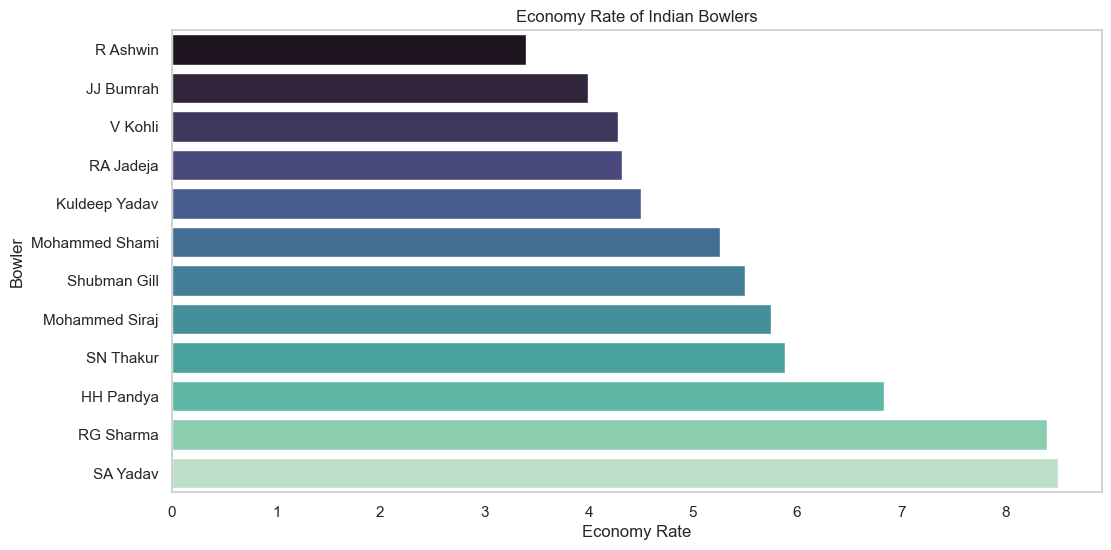

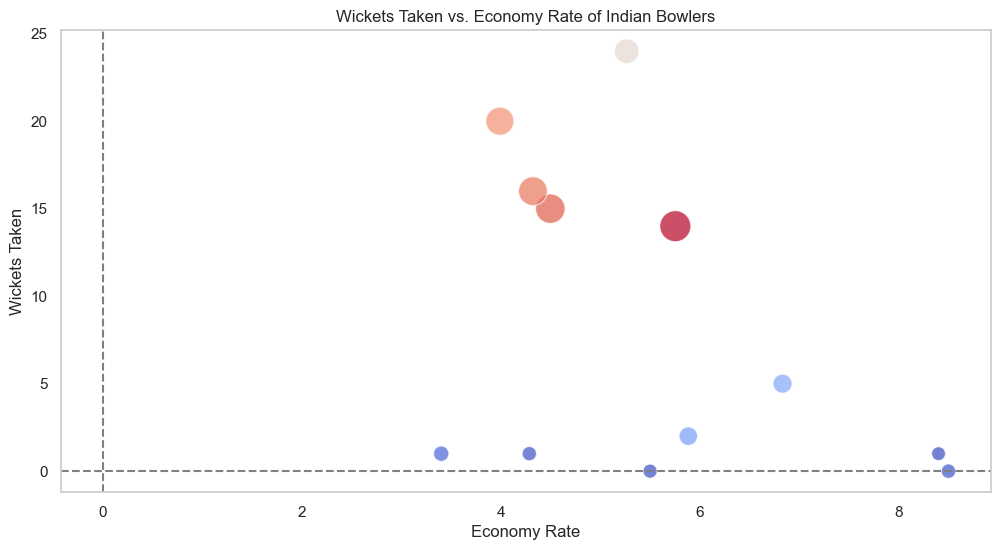

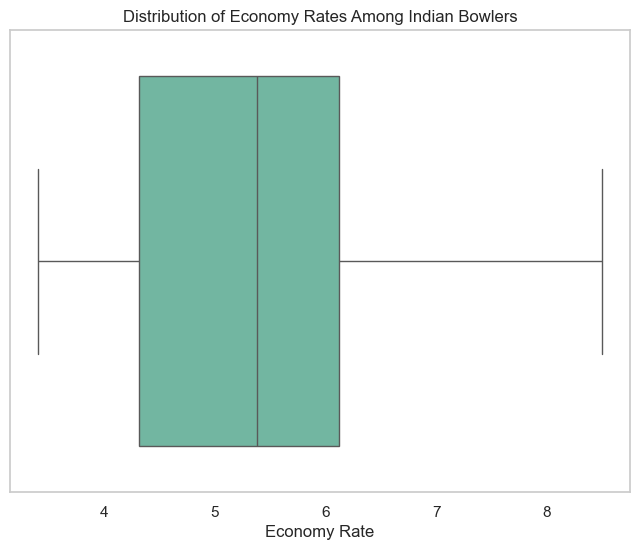

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming india_bowling_stats DataFrame is already created from the previous steps

# Step 1: Set the style for seaborn
sns.set(style='whitegrid')

# Step 2: Visualizing Total Runs Conceded by Each Bowler
plt.figure(figsize=(12, 6))
sns.barplot(data=india_bowling_stats.sort_values(by='total_runs_conceded', ascending=False), 
            x='total_runs_conceded', 
            y='bowler', 
            palette='viridis')
plt.title('Total Runs Conceded by Indian Bowlers')
plt.xlabel('Total Runs Conceded')
plt.ylabel('Bowler')
plt.grid(axis='x')
plt.show()

# Step 3: Visualizing Wickets Taken by Each Bowler
plt.figure(figsize=(12, 6))
sns.barplot(data=india_bowling_stats.sort_values(by='wickets', ascending=False), 
            x='wickets', 
            y='bowler', 
            palette='rocket')
plt.title('Wickets Taken by Indian Bowlers')
plt.xlabel('Number of Wickets')
plt.ylabel('Bowler')
plt.grid(axis='x')
plt.show()

# Step 4: Visualizing Economy Rate of Each Bowler
plt.figure(figsize=(12, 6))
sns.barplot(data=india_bowling_stats.sort_values(by='economy_rate'), 
            x='economy_rate', 
            y='bowler', 
            palette='mako')
plt.title('Economy Rate of Indian Bowlers')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.grid(axis='x')
plt.show()

# Step 5: Scatter Plot for Wickets Taken vs. Economy Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=india_bowling_stats, 
                x='economy_rate', 
                y='wickets', 
                size='total_runs_conceded', 
                sizes=(100, 500), 
                hue='total_runs_conceded', 
                palette='coolwarm', 
                alpha=0.7, 
                legend=False)
plt.title('Wickets Taken vs. Economy Rate of Indian Bowlers')
plt.xlabel('Economy Rate')
plt.ylabel('Wickets Taken')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid()
plt.show()

# Step 6: Box Plot for Economy Rate Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=india_bowling_stats, x='economy_rate', palette='Set2')
plt.title('Distribution of Economy Rates Among Indian Bowlers')
plt.xlabel('Economy Rate')
plt.grid(axis='x')
plt.show()


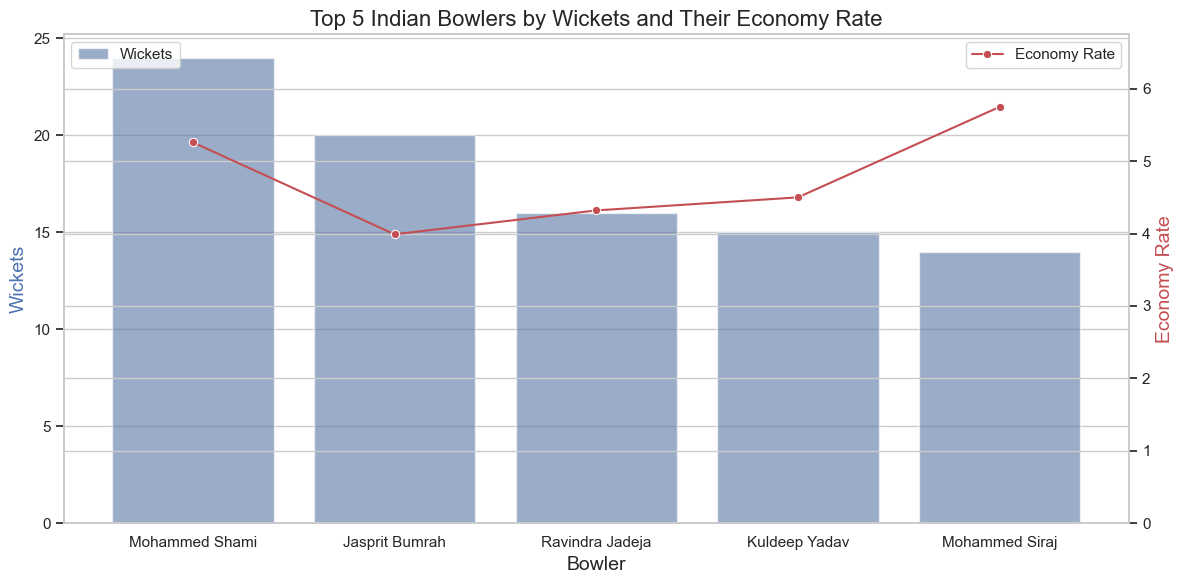

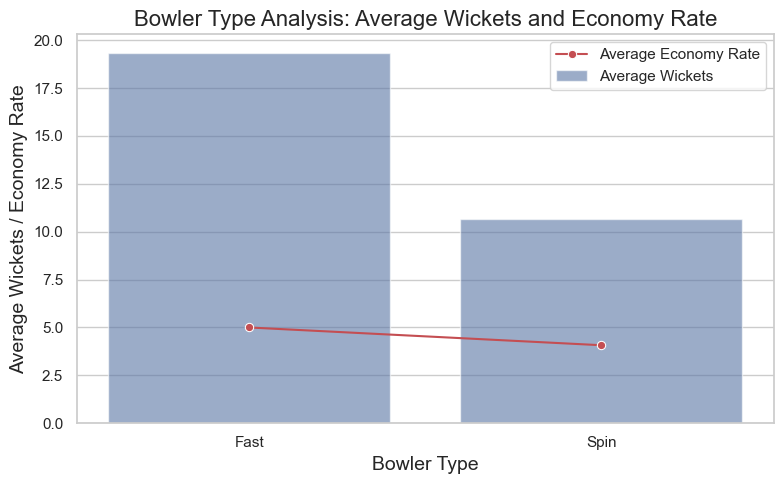

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation (you would replace this with your actual data)
data = {
    'bowler': ['Mohammed Shami', 'Jasprit Bumrah', 'Ravindra Jadeja', 'Kuldeep Yadav', 'Mohammed Siraj', 'R Ashwin'],
    'total_runs_conceded': [265, 381, 407, 431, 491, 34],
    'extras_given': [27, 34, 14, 11, 39, 0],
    'balls_bowled': [302, 573, 565, 575, 512, 60],
    'wickets': [24, 20, 16, 15, 14, 1],
    'economy_rate': [5.26, 3.99, 4.32, 4.50, 5.75, 3.40]
}
india_bowling_stats = pd.DataFrame(data)

# Step 1: Visualize Top 5 Bowlers Based on Wickets and Their Economy Rate
top_bowlers = india_bowling_stats.nlargest(5, 'wickets')

plt.figure(figsize=(12, 6))

# Create twin axes for both bar and line plots
ax1 = plt.gca()
ax2 = ax1.twinx()

# Bar plot for wickets
sns.barplot(x='bowler', y='wickets', data=top_bowlers, ax=ax1, color='b', label='Wickets', alpha=0.6)

# Line plot for economy rate
sns.lineplot(x='bowler', y='economy_rate', data=top_bowlers, ax=ax2, color='r', marker='o', label='Economy Rate')

# Set the axis labels and title
ax1.set_xlabel('Bowler', fontsize=14)
ax1.set_ylabel('Wickets', fontsize=14, color='b')
ax2.set_ylabel('Economy Rate', fontsize=14, color='r')
plt.title('Top 5 Indian Bowlers by Wickets and Their Economy Rate', fontsize=16)

# Set the tick labels for the secondary y-axis
ax2.set_ylim(0, max(top_bowlers['economy_rate']) + 1)  # Adjust y-limits for economy rate if necessary

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Perform Bowler Type Analysis
# Categorize bowlers into fast and spin
bowler_type_data = {
    'bowler': ['R Ashwin', 'Ravindra Jadeja', 'Kuldeep Yadav', 'Mohammed Shami', 'Jasprit Bumrah', 'Mohammed Siraj'],
    'type': ['Spin', 'Spin', 'Spin', 'Fast', 'Fast', 'Fast'],
    'wickets': [1, 16, 15, 24, 20, 14],
    'economy_rate': [3.40, 4.32, 4.50, 5.26, 3.99, 5.75]
}
bowler_type_stats = pd.DataFrame(bowler_type_data)

# Calculate averages for each type
type_analysis = bowler_type_stats.groupby('type').agg(
    avg_wickets=('wickets', 'mean'),
    avg_economy_rate=('economy_rate', 'mean')
).reset_index()

# Step 3: Visualize Bowler Type Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x='type', y='avg_wickets', data=type_analysis, color='b', label='Average Wickets', alpha=0.6)
sns.lineplot(x='type', y='avg_economy_rate', data=type_analysis, color='r', marker='o', label='Average Economy Rate')

# Set the axis labels and title
plt.xlabel('Bowler Type', fontsize=14)
plt.ylabel('Average Wickets / Economy Rate', fontsize=14)
plt.title('Bowler Type Analysis: Average Wickets and Economy Rate', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Top Players of the Match Awards:
              player  awards
0     Mohammed Shami       3
1            TM Head       3
2          RG Sharma       2
3         GJ Maxwell       2
4            V Kohli       2
5            A Zampa       2
6       Fakhar Zaman       2
7          Q de Kock       2
8  HE van der Dussen       2
9      Mohammad Nabi       1


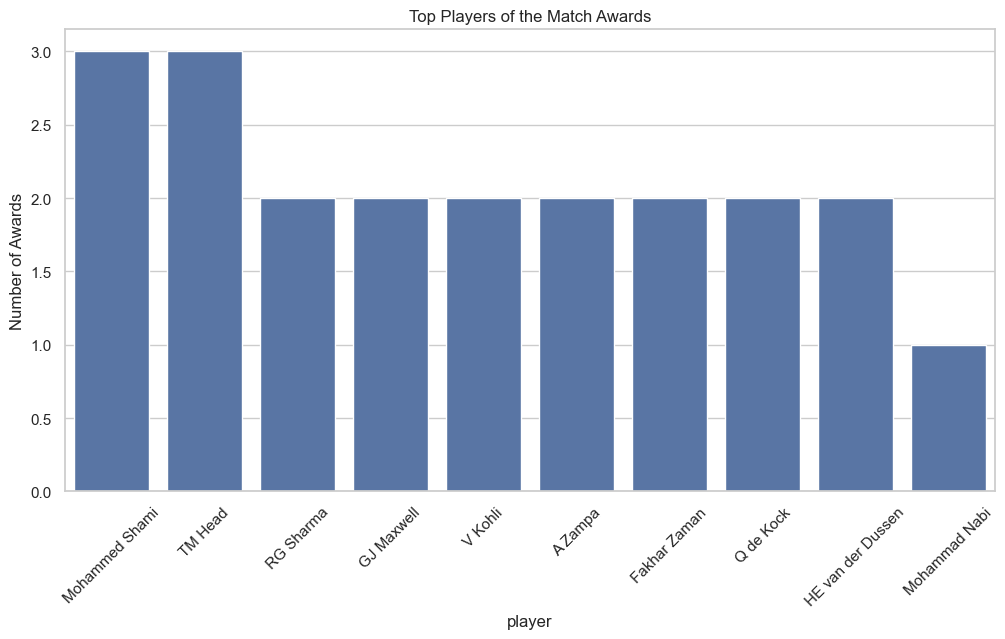

In [108]:
# Player of the Match Analysis
player_of_match_counts = matches_df['player_of_match'].value_counts()
top_players = player_of_match_counts.head(10).reset_index()
top_players.columns = ['player', 'awards']

print("Top Players of the Match Awards:")
print(top_players)

# Plotting Top Players of the Match Awards
plt.figure(figsize=(12, 6))
sns.barplot(data=top_players, x='player', y='awards')
plt.title('Top Players of the Match Awards')
plt.xticks(rotation=45)
plt.ylabel('Number of Awards')
plt.show()


   batting_team  total_runs  total_balls  strike_rate
0   Afghanistan        1990         2459    80.927206
1     Australia        2945         3121    94.360782
2    Bangladesh        1134         1430    79.300699
3       England         993         1202    82.612313
4         India        3038         3058    99.345978
5   Netherlands         915         1272    71.933962
6   New Zealand        2712         2696   100.593472
7      Pakistan        1185         1304    90.874233
8  South Africa        2773         2864    96.822626
9     Sri Lanka         944         1257    75.099443


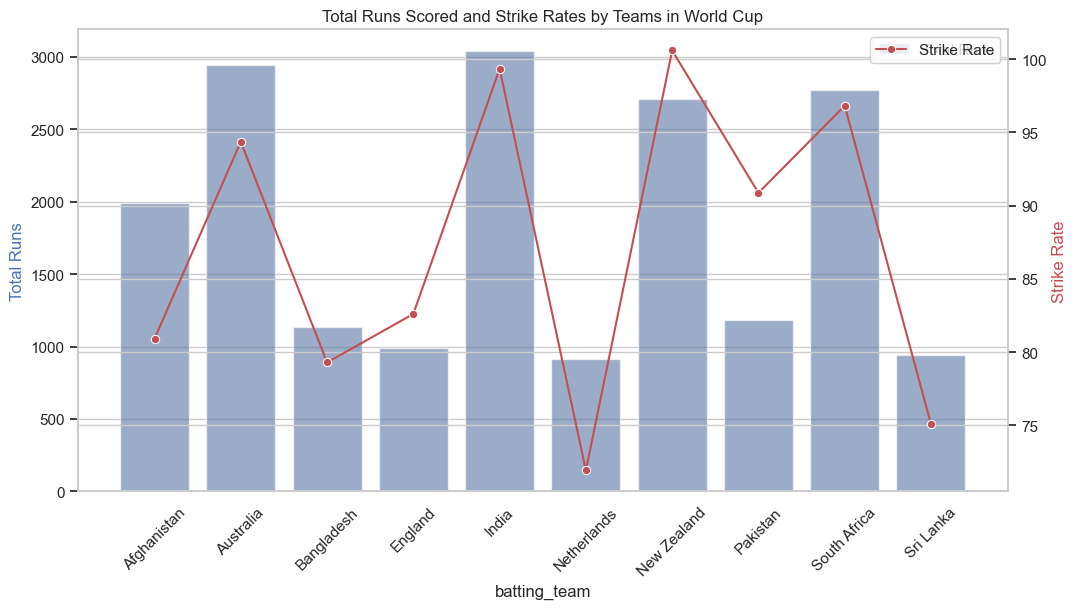

In [130]:


# Define the teams you are interested in
teams_of_interest = ['India', 'Australia', 'South Africa', 'New Zealand', 'Afghanistan']

# Filter matches for the teams of interest
world_cup_matches = matches_df[matches_df['team1'].isin(teams_of_interest) | matches_df['team2'].isin(teams_of_interest)]

# Extract relevant match IDs
match_ids = world_cup_matches['match_number'].unique()

# Filter the ball-by-ball data for these matches and teams
filtered_ball_by_ball_df = ball_by_ball_df[ball_by_ball_df['match_id'].isin(match_ids)]

# Calculate total runs and balls faced by each team
total_runs_balls = (
    filtered_ball_by_ball_df.groupby('batting_team')
    .agg(total_runs=('runs_off_bat', 'sum'),
         total_balls=('ball', 'count'))  # Each row represents one ball bowled
    .reset_index()
)

# Calculate strike rate
total_runs_balls['strike_rate'] = (total_runs_balls['total_runs'] / total_runs_balls['total_balls']) * 100

# Display the results
print(total_runs_balls)

# Visualize the total runs and strike rates
plt.figure(figsize=(12, 6))

# Create a dual-axis plot
sns.barplot(data=total_runs_balls, x='batting_team', y='total_runs', color='b', alpha=0.6, label='Total Runs', ci=None)
plt.ylabel('Total Runs', color='b')
plt.xticks(rotation=45)

# Create a line plot for strike rate
ax2 = plt.gca().twinx()
sns.lineplot(data=total_runs_balls, x='batting_team', y='strike_rate', color='r', marker='o', label='Strike Rate', ax=ax2)
ax2.set_ylabel('Strike Rate', color='r')

# Add legends and title
plt.title('Total Runs Scored and Strike Rates by Teams in World Cup')
ax2.legend(loc='upper right')
plt.show()


In [132]:
# Filter matches involving the teams of interest
matches_of_interest = matches_df[matches_df['team1'].isin(teams_of_interest) | matches_df['team2'].isin(teams_of_interest)]

# Count the number of wins for each team
outcome_counts = matches_of_interest['winner'].value_counts()

# Count total matches played by each team
total_matches_played = matches_of_interest['team1'].value_counts() + matches_of_interest['team2'].value_counts()

# Create a summary DataFrame
match_outcomes = pd.DataFrame({
    'matches_played': total_matches_played,
    'matches_won': outcome_counts
}).fillna(0)

# Calculate matches lost
match_outcomes['matches_lost'] = match_outcomes['matches_played'] - match_outcomes['matches_won']
match_outcomes['win_percentage'] = (match_outcomes['matches_won'] / match_outcomes['matches_played']) * 100

print("Match Outcomes Summary:")
print(match_outcomes)


Match Outcomes Summary:
              matches_played  matches_won  matches_lost  win_percentage
Afghanistan                9          4.0           5.0       44.444444
Australia                 11          9.0           2.0       81.818182
Bangladesh                 5          1.0           4.0       20.000000
England                    5          0.0           5.0        0.000000
India                     11         10.0           1.0       90.909091
Netherlands                5          1.0           4.0       20.000000
New Zealand               10          5.0           5.0       50.000000
Pakistan                   5          1.0           4.0       20.000000
South Africa              10          7.0           3.0       70.000000
Sri Lanka                  5          0.0           5.0        0.000000


In [136]:
# Extract winning margins for each match
winning_margins = matches_of_interest[['winner', 'winner_runs', 'winner_wickets']]

# Initialize a new DataFrame to capture the winning margins summary
winning_margins_summary = winning_margins.groupby('winner').agg(
    total_runs_won=('winner_runs', lambda x: (x > 0).sum()),  # Count of matches won by runs (i.e., winning runs > 0)
    total_wickets_won=('winner_wickets', lambda x: (x > 0).sum()),  # Count of matches won by wickets (i.e., winning wickets > 0)
    total_winning_runs=('winner_runs', 'sum'),  # Total runs won
    total_winning_wickets=('winner_wickets', 'sum')  # Total wickets won
).reset_index()

# Rename columns for clarity
winning_margins_summary.rename(columns={
    'total_runs_won': 'matches_won_by_runs',
    'total_wickets_won': 'matches_won_by_wickets'
}, inplace=True)

print("Winning Margins Summary:")
print(winning_margins_summary)


Winning Margins Summary:
         winner  matches_won_by_runs  matches_won_by_wickets  \
0   Afghanistan                    1                       3   
1     Australia                    4                       5   
2    Bangladesh                    0                       1   
3         India                    5                       5   
4   Netherlands                    1                       0   
5   New Zealand                    2                       3   
6      Pakistan                    1                       0   
7  South Africa                    5                       2   

   total_winning_runs  total_winning_wickets  
0                69.0                   22.0  
1               409.0                   25.0  
2                 0.0                    6.0  
3               875.0                   32.0  
4                38.0                    0.0  
5               248.0                   22.0  
6                21.0                    0.0  
7               804.0 

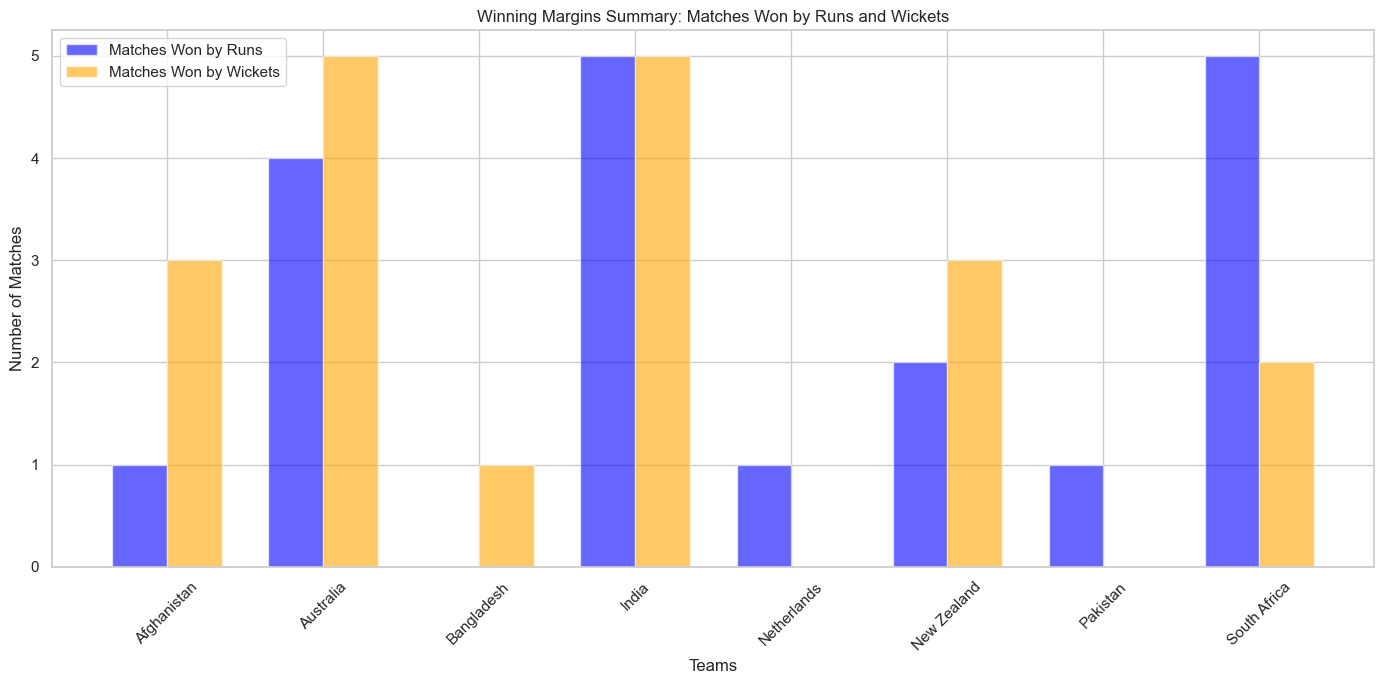

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of seaborn
sns.set(style='whitegrid')

# Prepare data for plotting
teams = winning_margins_summary['winner']
matches_won_by_runs = winning_margins_summary['matches_won_by_runs']
matches_won_by_wickets = winning_margins_summary['matches_won_by_wickets']

# Set the figure size
plt.figure(figsize=(14, 7))

# Define the positions for each bar on the x-axis
x = np.arange(len(teams))

# Set bar width
bar_width = 0.35

# Create a bar plot for matches won by runs
plt.bar(x - bar_width/2, matches_won_by_runs, width=bar_width, label='Matches Won by Runs', color='blue', alpha=0.6)

# Create a bar plot for matches won by wickets
plt.bar(x + bar_width/2, matches_won_by_wickets, width=bar_width, label='Matches Won by Wickets', color='orange', alpha=0.6)

# Adding labels and titles
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.title('Winning Margins Summary: Matches Won by Runs and Wickets')
plt.xticks(x, teams, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
